In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
festivales_bcn_13 = pd.read_pickle("./data/festivales_bcn_13_procesado.pkl")

In [3]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [4]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [5]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [6]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [7]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [8]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [9]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [10]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [11]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [12]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [13]:
festivales_bcn_13.describe().loc["mean"]

Any            2013.000000
Edicio           12.909091
Asistentes    28993.000000
Name: mean, dtype: float64

In [14]:
festivales_bcn_13.describe().loc["50%"]

Any            2013.0
Edicio           11.0
Asistentes    10400.0
Name: 50%, dtype: float64

In [15]:
festivales_bcn_13.describe().loc["max"]

Any             2013.0
Edicio            45.0
Asistentes    171190.0
Name: max, dtype: float64

In [16]:
festivales_bcn_13.describe().loc["min"]

Any           2013.0
Edicio           1.0
Asistentes    1500.0
Name: min, dtype: float64

In [17]:
festivales_bcn_13[categoricas_destacadas].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Junio
Estacion,Primavera
Entrada,De Pago


Comentarios <br>
Com una mediana de unos 10 mil asistentes, el festival tipo de Barcelona es de música y con entrada pagada, con mayor redominancia en primavera, aunque mayor concentración en junio. Es el mismo perfil que en 2017, 2016, y 2014, aunque co mayor concentración en primavera

Frecuencias relativa y absoluta

In [18]:
for catego in categoricas_destacadas:
    print(festivales_bcn_13[catego].value_counts())
    print("\n")

Ambit
Música                         18
Audiovisuals                   13
Lletres                         4
Arts escèniques                 4
Arts visuals                    3
Multidisciplinaris i altres     3
Name: count, dtype: int64


Titularidad
Privada    38
Pública     6
Mixta       1
Name: count, dtype: int64


Mes
Junio         8
Julio         6
Mayo          6
Enero         6
Noviembre     5
Octubre       4
Septiembre    3
Abril         3
Diciembre     2
Agosto        1
Febrero       1
Name: count, dtype: int64


Estacion
Primavera    16
Verano       11
Otoño        11
Invierno      7
Name: count, dtype: int64


Entrada
De Pago    34
Gratis      8
Mixta       3
Name: count, dtype: int64




In [19]:
for catego in categoricas_destacadas:
    print(festivales_bcn_13[catego].value_counts()/len(festivales_bcn_13)*100)
    print("\n")

Ambit
Música                         40.000000
Audiovisuals                   28.888889
Lletres                         8.888889
Arts escèniques                 8.888889
Arts visuals                    6.666667
Multidisciplinaris i altres     6.666667
Name: count, dtype: float64


Titularidad
Privada    84.444444
Pública    13.333333
Mixta       2.222222
Name: count, dtype: float64


Mes
Junio         17.777778
Julio         13.333333
Mayo          13.333333
Enero         13.333333
Noviembre     11.111111
Octubre        8.888889
Septiembre     6.666667
Abril          6.666667
Diciembre      4.444444
Agosto         2.222222
Febrero        2.222222
Name: count, dtype: float64


Estacion
Primavera    35.555556
Verano       24.444444
Otoño        24.444444
Invierno     15.555556
Name: count, dtype: float64


Entrada
De Pago    75.555556
Gratis     17.777778
Mixta       6.666667
Name: count, dtype: float64




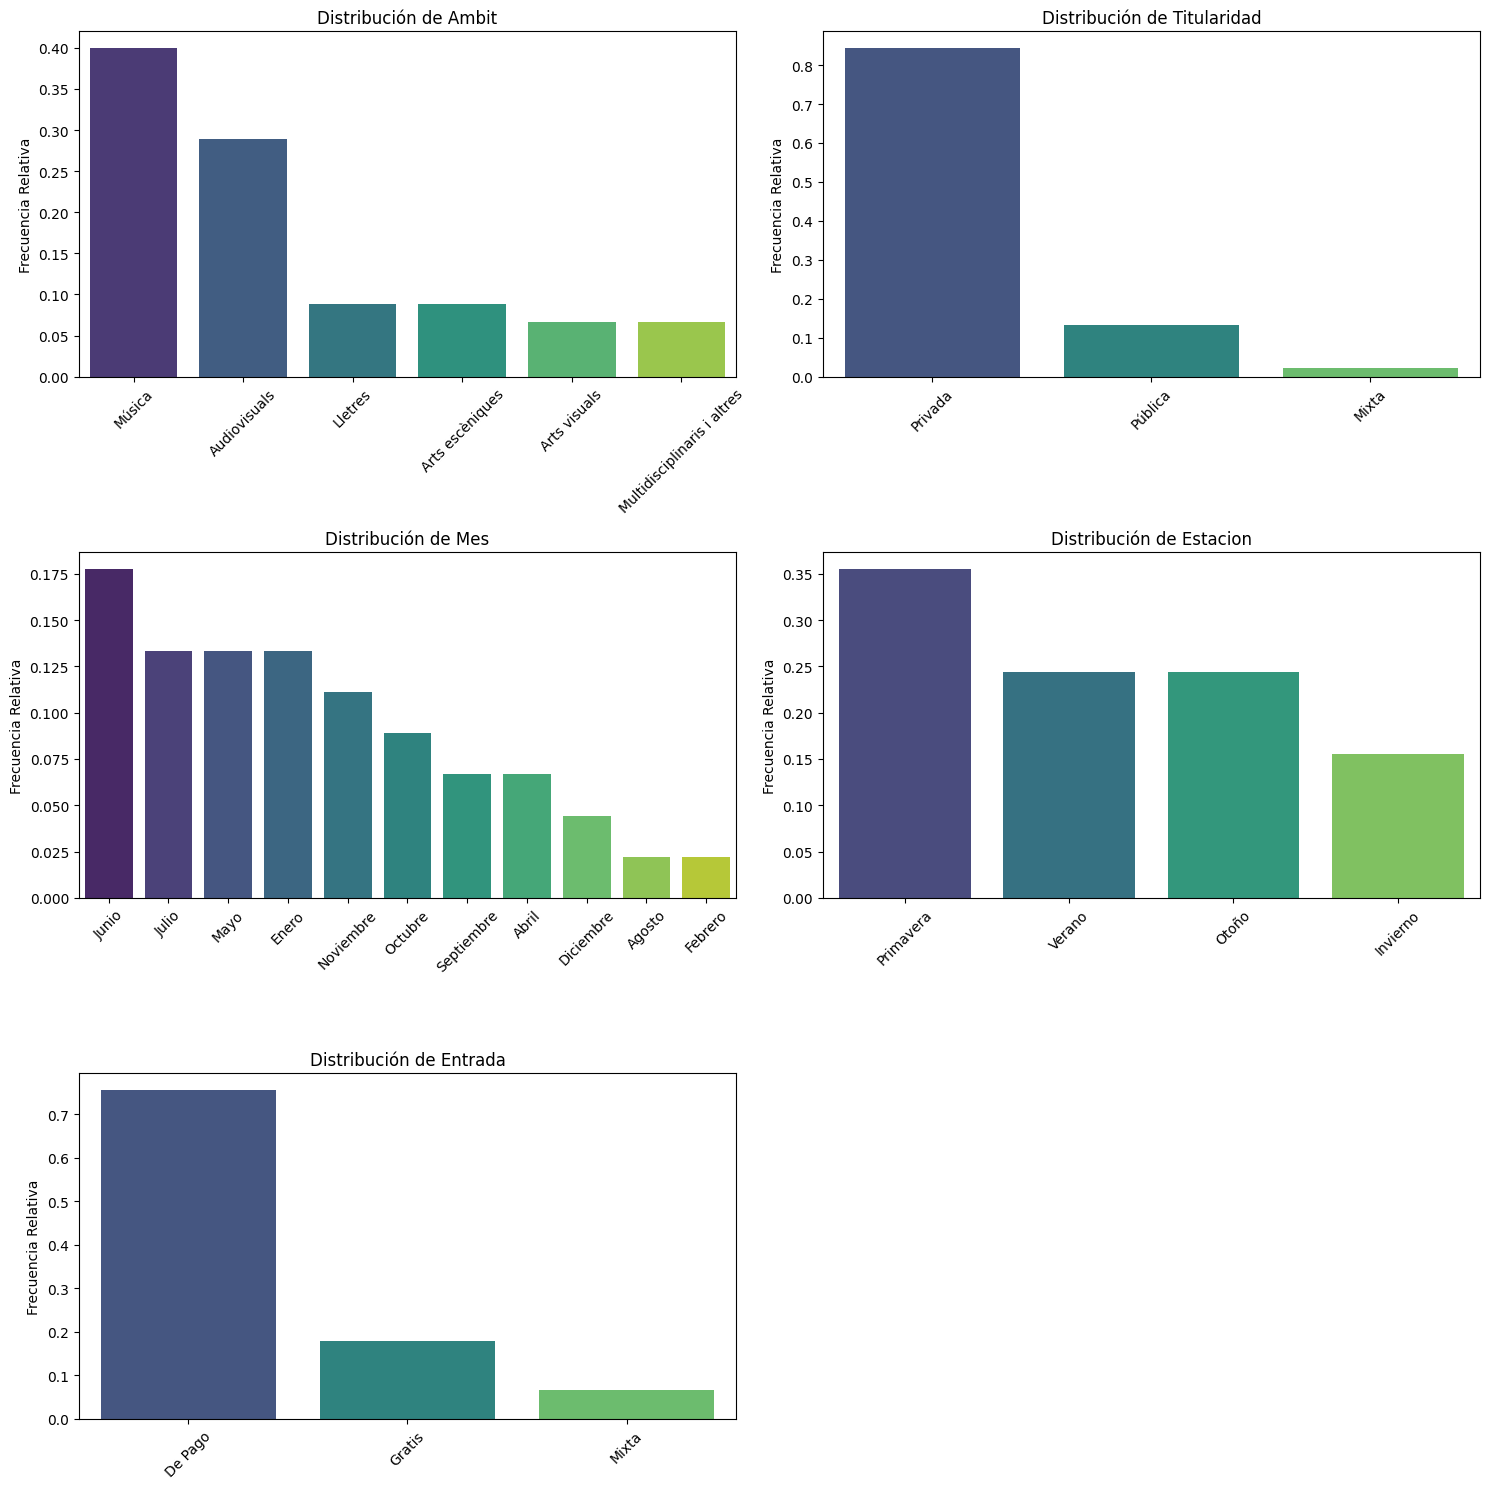

In [20]:
pinta_distribucion_categoricas(festivales_bcn_13, categoricas_destacadas, relativa = True)

Comentarios <br>
El número de propuestas del sector privado quintuplica las del sector público, y proporción de festivales gratuitos vs. de pago es cercana al triple. El 2014 es similar, pero luego ya no se vuelve a ver esta (des)proporción en los siguientes años.<br>
Hay festivales programados casi todos los meses, excepto diciembre. Y hay un predominio muy marcado de junio. Y predominio de la primavera, con el invierno en última posición<br>
La música es sin duda la protagonista de los festivales, seguida de lejos por los audivisuales, y mucho más lejos pero en proporciones similares, tanto escénicas como visuales y multidisiplinares y hasta letras, todas a la par. <br>
Estas conclusiones parecen repetirse en la mayoría de los años, excepto en la pandemia y justo después

Medidas de posición

In [21]:
festivales_bcn_13.describe()

,Any,Edicio,Asistentes
count,45.0,44.000000,45.000000
mean,2013.0,12.909091,28993.000000
std,0.0,9.330665,43345.480924
min,2013.0,1.000000,1500.000000
25%,2013.0,5.750000,6355.000000
50%,2013.0,11.000000,10400.000000
75%,2013.0,18.000000,29253.000000
max,2013.0,45.000000,171190.000000


In [22]:
get_IQR(festivales_bcn_13,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

12.25

In [23]:
print(festivales_bcn_13["Edicio"].quantile(0.5), "\n",
    festivales_bcn_13["Edicio"].quantile(0.9), "\n",
    festivales_bcn_13["Edicio"].quantile(0.95), "\n",
    festivales_bcn_13["Edicio"].max())

11.0 
 23.700000000000003 
 25.700000000000003 
 45.0


In [24]:
get_IQR(festivales_bcn_13,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

22898.0

In [25]:
print(festivales_bcn_13["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_13["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_13["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_13["Asistentes"].max())

10400.0 
 93408.00000000006 
 132318.79999999996 
 171190.0


Comentarios: <br>
Alta dispersión en el número de asistentes. La mediana ronda los 10.500, unas 9 veces menos que el primer 90%, cercano a los 90 mil, que da un salto interesante hasta los 130 mil, y hacia el final sigue aumentando pero de forma relativamente gradual, con un máximo de 170 mil, que es 17 veces la mediana, lo que representa la segunda proporción mas baja de la década observada.

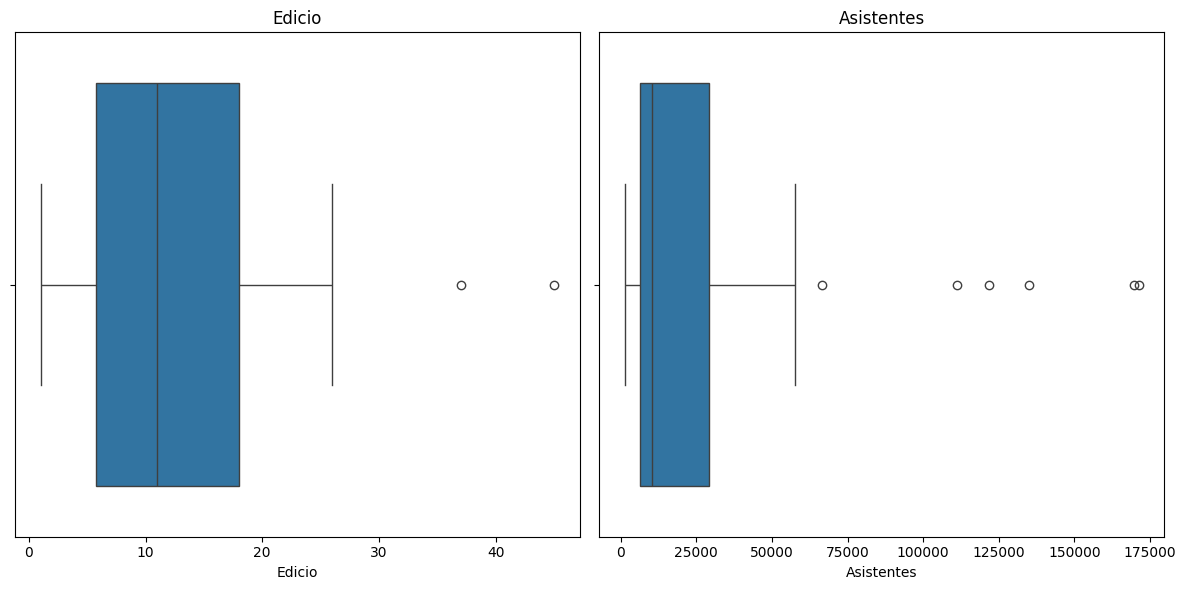

In [26]:
plot_multiple_boxplots(festivales_bcn_13, columnas_numericas_fests)

Comentarios: <br>
Gracias a los boxplots podemos observar como no hay una media centrada, y además hay bastantes outliers en las cifras de asistentes.

In [27]:
plot_boxplot_grouped(festivales_bcn_13, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [28]:
festivales_bcn_13.describe().loc[["std", "mean"]].T

,std,mean
Any,0.000000,2013.000000
Edicio,9.330665,12.909091
Asistentes,43345.480924,28993.000000


In [29]:
variabilidad(festivales_bcn_13)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Any,0.000000,2013.000000,0.000000
Edicio,9.330665,12.909091,0.722798
Asistentes,43345.480924,28993.000000,1.495033


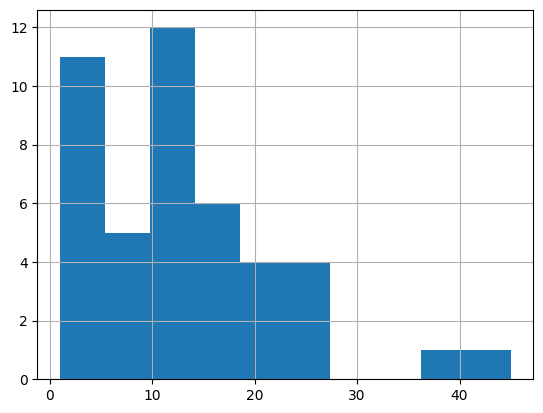

In [30]:
festivales_bcn_13["Edicio"].hist();

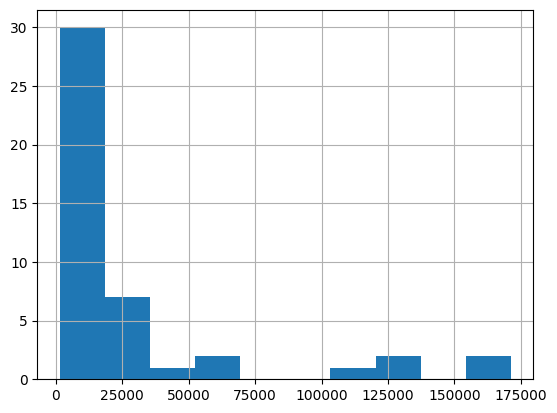

In [31]:
festivales_bcn_13["Asistentes"].hist();

Distribución

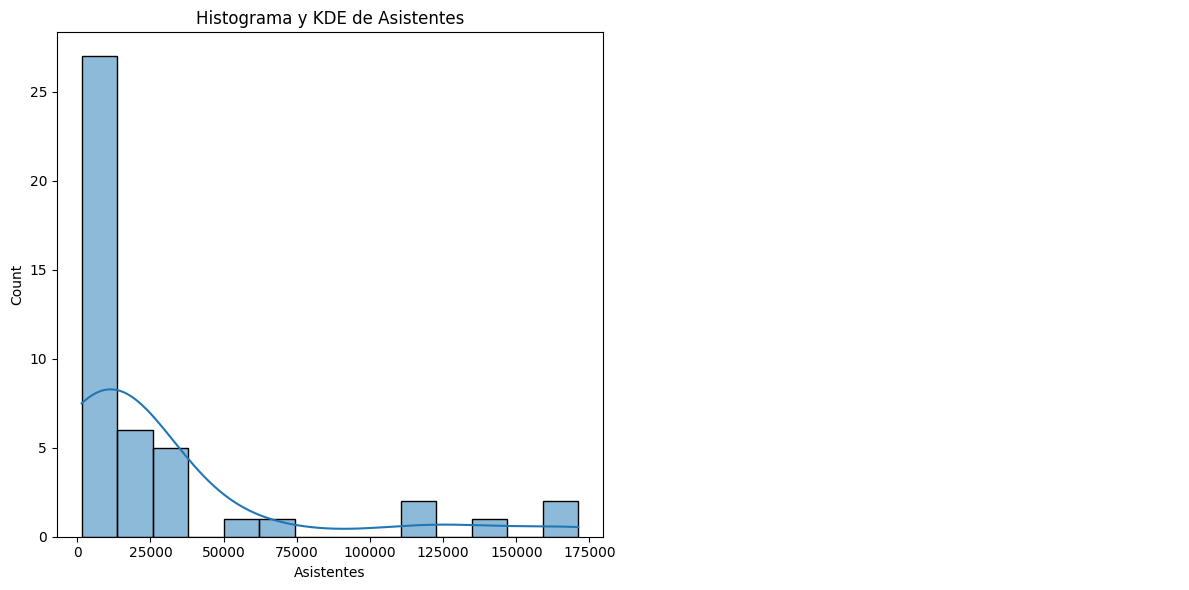

In [32]:
plot_histo_den(festivales_bcn_13, ["Asistentes"])

Anomalías outliers

(2,)


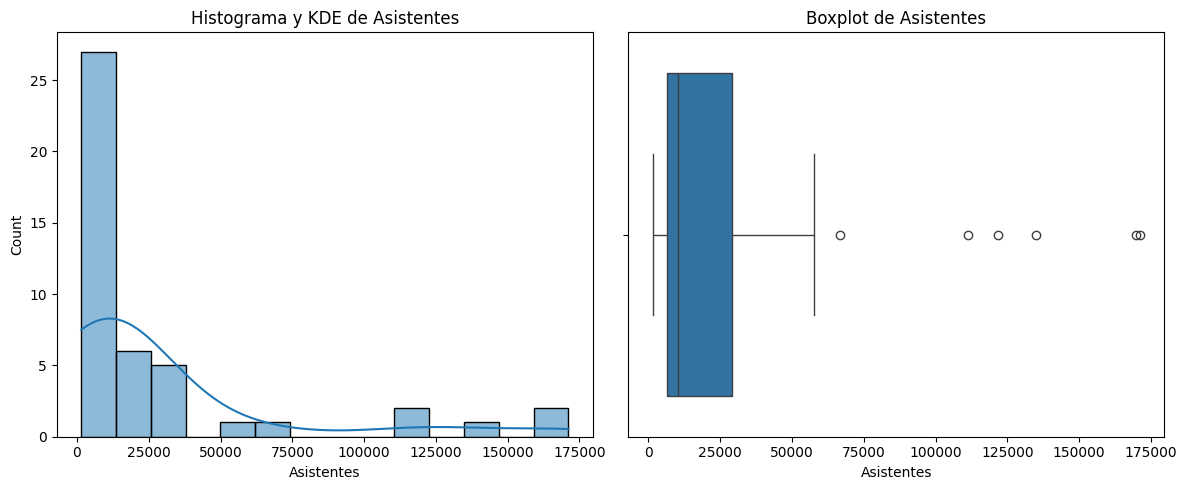

In [33]:
plot_combined_graphs(festivales_bcn_13, ["Asistentes"])

In [34]:
festivales_bcn_13 = festivales_bcn_13.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_13.head(10)  
tipo_entradas_top_festivales = primeros_10['Entrada'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")

De Pago: 6 - 60.00%
Gratis: 2 - 20.00%
Mixta: 2 - 20.00%


In [35]:
festivales_bcn_13 = festivales_bcn_13.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_13.head(10)  
tipo_entradas_top_festivales = primeros_10['Ambit'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")

Música: 5 - 50.00%
Arts escèniques: 2 - 20.00%
Arts visuals: 1 - 10.00%
Multidisciplinaris i altres: 1 - 10.00%
Audiovisuals: 1 - 10.00%


In [36]:
festivales_bcn_13

,Any,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
40,2013,Música,13.0,Primavera Sound,Privada,Mayo,Primavera,171190.0,De Pago
35,2013,Arts escèniques,4.0,Mercè Arts de Carrer. MAC,Pública,Septiembre,Verano,169694.0,Gratis
31,2013,Arts visuals,11.0,Loop Festival,Privada,Mayo,Primavera,135000.0,De Pago
43,2013,Música,20.0,Sónar. Festival Internacional de Música Avança...,Privada,Junio,Primavera,121594.0,De Pago
2,2013,Música,21.0,BAM. Barcelona Acció Musical,Pública,Septiembre,Verano,111290.0,Gratis
28,2013,Arts escèniques,37.0,Grec Festival de Barcelona,Pública,Julio,Verano,66585.0,Mixta
12,2013,Multidisciplinaris i altres,3.0,FADfest. The festival of all design,Privada,Junio,Primavera,57785.0,Mixta
32,2013,Música,11.0,Mas i Mas Festival,Privada,Julio,Verano,37339.0,De Pago
41,2013,Audiovisuals,11.0,Sala Montjuïc,Privada,Junio,Verano,34266.0,De Pago
13,2013,Música,6.0,Festival Cruïlla,Privada,Julio,Verano,31000.0,De Pago
